In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot
import scipy
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [3]:
import yfinance

In [5]:
stock_data=yfinance.download('NG=F','2008-01-01','2021-01-18',auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [6]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [8]:
stock_data.shape

(3282, 5)

In [9]:
stock_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-11,2.600,2.811,2.589,2.747,177248
2021-01-12,2.794,2.899,2.718,2.753,201432
2021-01-13,2.737,2.826,2.708,2.727,169240
2021-01-14,2.742,2.791,2.660,2.666,163043
2021-01-15,2.672,2.800,2.636,2.737,150994


In [10]:
stock_data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: xlabel='Date'>

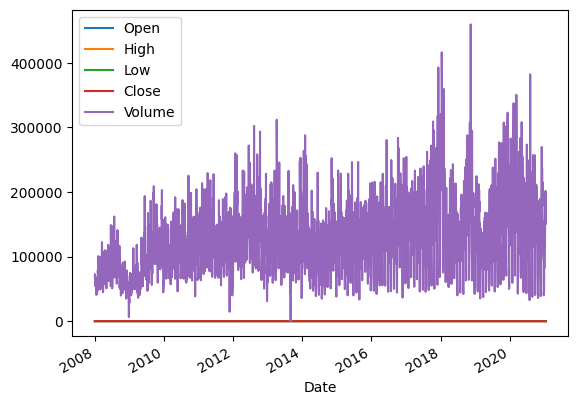

In [11]:
stock_data.plot()

In [15]:
stock_data['Close'].skew()
# stock_data['Close'].kurtosis()

2.611315764580529

In [16]:
stock_data.skew()

Open      2.609164
High      2.593044
Low       2.627929
Close     2.611316
Volume    0.863648
dtype: float64

<Axes: xlabel='Date'>

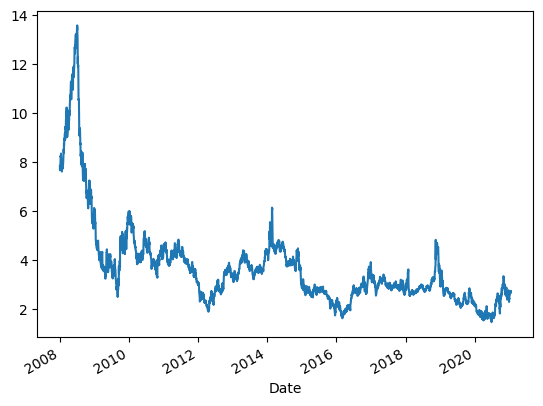

In [19]:
stock_data['Close'].plot()

In [20]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={'C':[1,0.1,0.01,100,10,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']  
             }

In [25]:
params=GridSearchCV(SVR(),param_grid=param_grid,refit=True,verbose=3)

In [28]:
train_data,test_data=train_test_split(stock_data,test_size=0.2,random_state=0)

In [29]:
train_data.shape

(2625, 5)

In [30]:
test_data.shape

(657, 5)

In [31]:
train_y=train_data['Close']
train_data=train_data.drop('Close',axis=1)

In [32]:
test_y=test_data['Close']
test_data=test_data.drop('Close',axis=1)

In [33]:
params.fit(train_data,train_y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 0.1, 0.01, 100, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [34]:
params.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [36]:
res=params.predict(test_data)

In [37]:
res

array([3.7636594 , 3.7636594 , 3.76230047, 3.7636594 , 3.24662595,
       3.7636594 , 3.81858881, 3.76365939, 3.7636594 , 3.17663649,
       2.79635778, 3.69380229, 2.71646624, 3.7636594 , 3.763641  ,
       3.69184436, 3.7636594 , 3.7636594 , 3.81907348, 3.76340839,
       3.75006374, 3.76728774, 3.7636594 , 2.46585631, 3.7636594 ,
       3.7636594 , 3.7636594 , 3.7659998 , 3.76364364, 3.45570794,
       3.76021819, 3.76036978, 3.7636594 , 3.01765259, 3.76371006,
       4.20837332, 3.7636594 , 3.7636594 , 3.7636594 , 3.5993751 ,
       3.76365892, 3.22674924, 3.76070891, 3.7636594 , 3.7636594 ,
       3.56999788, 4.91159594, 3.83623486, 3.78160489, 3.76367549,
       3.76364198, 3.7636594 , 3.74574784, 3.7636594 , 3.76367536,
       3.7636594 , 3.7636594 , 3.74389011, 3.7636594 , 3.7636594 ,
       3.7636594 , 2.91719588, 2.90585277, 3.72944159, 3.7636594 ,
       3.75976023, 3.7636594 , 3.76087993, 3.7636594 , 3.76365939,
       3.76365942, 3.76101064, 4.04958893, 3.7636594 , 3.76352

In [38]:
test_y

Date
2012-09-10    2.812
2009-12-23    5.821
2015-02-04    2.662
2009-12-28    5.990
2019-08-07    2.083
              ...  
2016-12-28    3.930
2013-02-12    3.230
2013-09-16    3.738
2019-04-22    2.524
2010-05-21    4.035
Name: Close, Length: 657, dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(res,test_y)

2.708212694141597